In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../data',
    image_size=(224, 224),
    batch_size=32
)
class_name=dataset.class_names

print("Included classes:",class_name)

Found 2152 files belonging to 3 classes.
Included classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0])

(32, 224, 224, 3)
[0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 2 1 0 1 0 0 2 1 0 1 1 0 1 0 1 0 1]
tf.Tensor(
[[[176.01021  178.01021  190.01021 ]
  [179.12245  181.12245  193.12245 ]
  [179.46428  181.46428  193.46428 ]
  ...
  [161.69449  159.69449  173.69449 ]
  [179.34181  177.34181  191.34181 ]
  [164.05585  162.05585  176.05585 ]]

 [[173.27551  175.27551  187.27551 ]
  [164.95409  166.95409  178.95409 ]
  [174.72958  176.72958  188.72958 ]
  ...
  [141.8617   139.8617   153.8617  ]
  [148.04102  146.04102  160.04102 ]
  [122.08102  120.08102  134.08102 ]]

 [[174.32654  176.32654  188.32654 ]
  [164.83163  166.83163  178.83163 ]
  [163.2551   165.2551   177.2551  ]
  ...
  [155.18358  153.18358  167.18358 ]
  [133.71924  131.71924  145.71924 ]
  [134.08684  132.08684  146.08684 ]]

 ...

 [[170.03062  168.03062  181.03062 ]
  [165.67343  163.67343  176.67343 ]
  [160.45398  158.45398  171.45398 ]
  ...
  [137.24005  134.24005  145.24005 ]
  [141.10701  138.10701  149.10701 ]
  [115.85158  112.

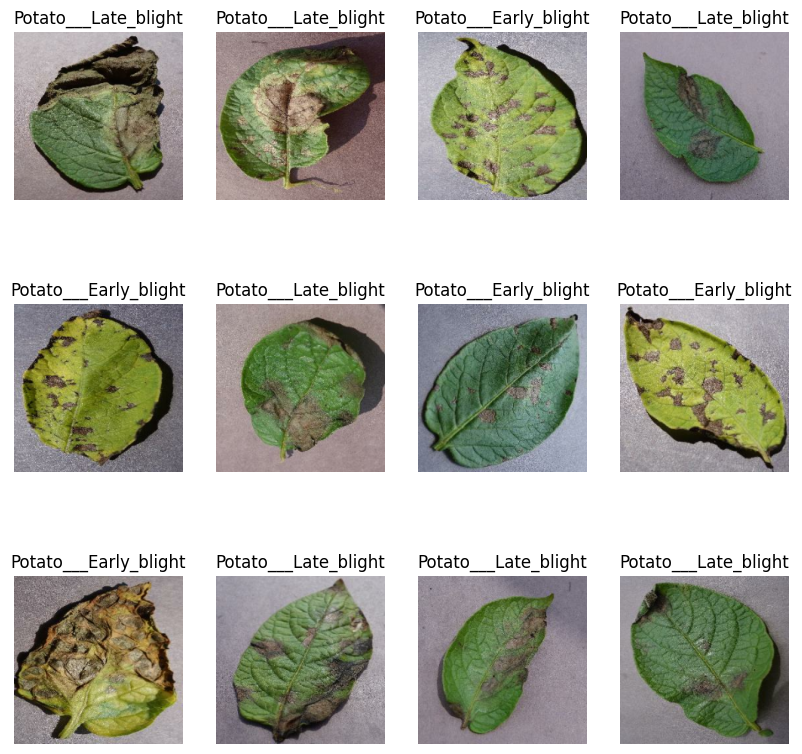

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")


In [ ]:

def get_dataset_partitions_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert(train_split+test_split+val_split)==1
  dataset_size=len(dataset)
  if shuffle:
    dataset=dataset.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*dataset_size)
  val_size=int(val_split*dataset_size)
  train_ds=dataset.take(train_size)
  val_ds=dataset.skip(train_size).take(val_size)
  test_ds=dataset.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [ ]:
data_augmentation=Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_name),activation='softmax'),
])
model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.4608 - loss: 0.9567 - val_accuracy: 0.4479 - val_loss: 0.8913
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5116 - loss: 0.8944 - val_accuracy: 0.7240 - val_loss: 0.8318
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6655 - loss: 0.7962 - val_accuracy: 0.8073 - val_loss: 0.5208
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7736 - loss: 0.5763 - val_accuracy: 0.7812 - val_loss: 0.4981
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8441 - loss: 0.3819 - val_accuracy: 0.8385 - val_loss: 0.4209
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8390 - loss: 0.3903 - val_accuracy: 0.9115 - val_loss: 0.2649
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8821 - loss: 0.2885 - val_accuracy: 0.8854 - val_loss: 0.2709
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8969 - loss: 0.2522 - val_accuracy: 0.8698 -

In [ ]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9792 - loss: 0.0551


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history.history['accuracy']

[0.47685185074806213,
 0.5480324029922485,
 0.6770833134651184,
 0.7916666865348816,
 0.8391203880310059,
 0.8396990895271301,
 0.8836805820465088,
 0.8969907164573669,
 0.8796296119689941,
 0.9131944179534912,
 0.8807870149612427,
 0.9137731194496155,
 0.9103009104728699,
 0.9224537014961243,
 0.9363425970077515,
 0.9427083134651184,
 0.9438657164573669,
 0.9427083134651184,
 0.9490740895271301,
 0.9438657164573669,
 0.9589120149612427,
 0.9386574029922485,
 0.9467592835426331,
 0.9525462985038757,
 0.9525462985038757,
 0.9699074029922485,
 0.9681712985038757,
 0.9594907164573669,
 0.9589120149612427,
 0.9699074029922485,
 0.9722222089767456,
 0.9809027910232544,
 0.9762731194496155,
 0.9722222089767456,
 0.9739583134651184,
 0.9826388955116272,
 0.9739583134651184,
 0.9780092835426331,
 0.9809027910232544,
 0.9872685074806213,
 0.9803240895271301,
 0.984375,
 0.9890046119689941,
 0.9866898059844971,
 0.9832175970077515,
 0.9861111044883728,
 0.9895833134651184,
 0.9809027910232544,
 

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

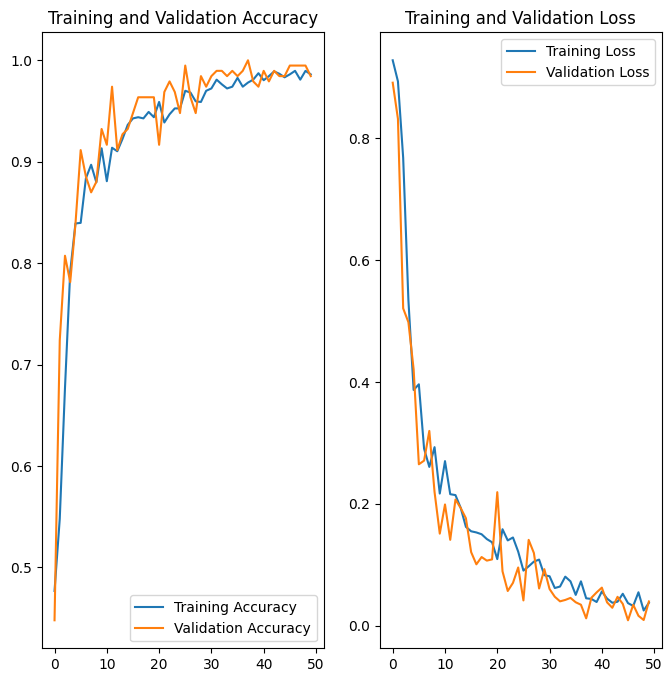

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to predict
Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Label: Potato___Early_blight


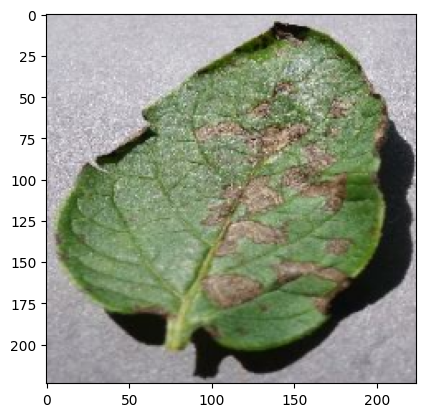

In [ ]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()
  print("First Image to predict")
  plt.imshow(first_image)
  print("Actual Label:",class_name[first_label])
  batch_prediction=model.predict(image_batch)
  print("Predicted Label:",class_name[np.argmax(batch_prediction[0])])



In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  predicted_class=class_name[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


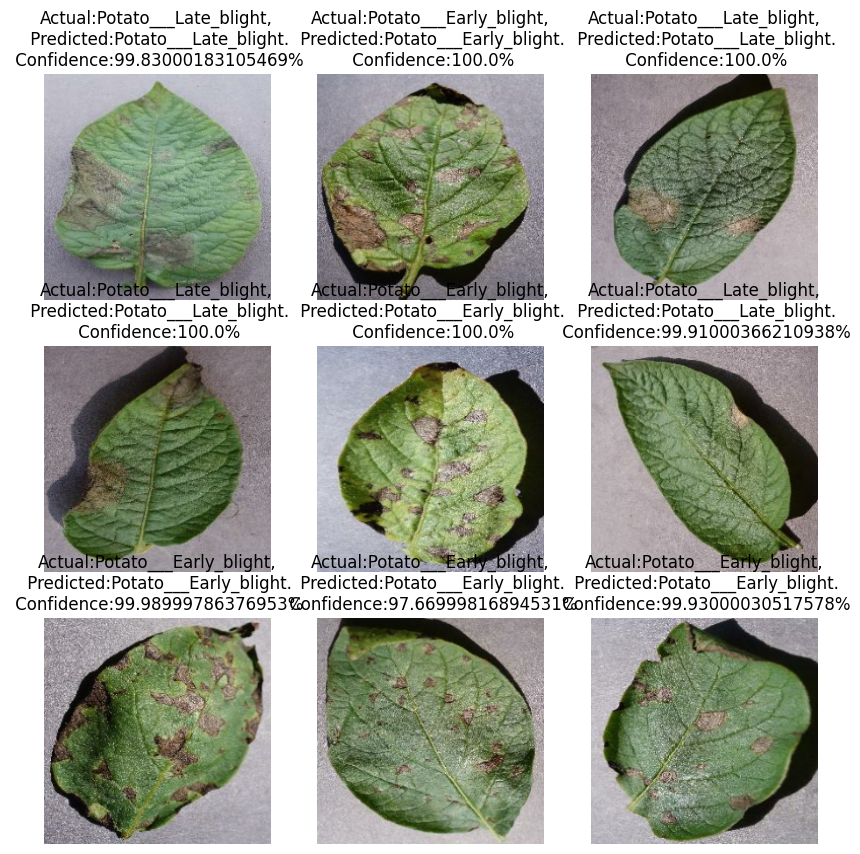

In [ ]:
for images,labels in test_ds.take(1):
  plt.figure(figsize=(10,10))
  plt.axis("off")
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    actual_class=class_name[labels[i]]
    predicted_class,confidence=predict(model,images[i].numpy())
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
    plt.axis("off")

In [ ]:
import os

In [ ]:
import os

model_dir = "/content/models"
os.makedirs(model_dir, exist_ok=True)

existing_versions = [int(i) for i in os.listdir(model_dir) if i.isdigit()]
model_version = max(existing_versions) + 1 if existing_versions else 1

model.export(f"{model_dir}/{model_version}")

Saved artifact at '/content/models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140002595863056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002595858448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381190096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381190672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381192592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381190288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381194320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381192784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381193552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140002381195280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1400023811950